In [2]:
pip install kagglehub  ####CON ESTE COMANDO SE INSTALAN LAS LIBRERIAS

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '####CON': Expected package name at the start of dependency specifier
    ####CON
    ^


In [3]:
import pandas as pd #MANIPULAR DATOS
import numpy as np #OPERACIONES NUMERICAS
import kagglehub ###BIBLIOTECA DE BASES DE DATOS

In [4]:
###DESCARGAR DATOS
path = kagglehub.dataset_download("mikhail1681/walmart-sales")
print("Ruta del dataset: ",path)

Ruta del dataset:  C:\Users\WILOo\.cache\kagglehub\datasets\mikhail1681\walmart-sales\versions\2


In [5]:
#CARGAR LOS DATOS
datos = pd.read_csv( path +'/Walmart_Sales.csv')

In [6]:
#VER LOS PRIMEROS REGISTROS DE LA TABLA DATOS
datos.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
#NUMERO DE COLUMNAS, REGISTROS NULOS, Y TIPOS DE DATOS
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
#CONVERTIMOS DATE A VARIABLE DE FECHA
datos['Date'] = pd.to_datetime(datos['Date'],format="%d-%m-%Y")

In [9]:
##VENTAS MENSUALES TOTALES
datos['fecha_mes'] = datos['Date'].dt.to_period('M').astype(str)
##AGRUPAMOS VENTAS POR FECHA MES
ventas_mensuales = datos.groupby('fecha_mes')['Weekly_Sales'].sum().reset_index()
ventas_mensuales = ventas_mensuales.rename(columns={'Weekly_Sales':'ventas'})

###COMO EL NUMERO DE VENTAS TOTALES ES MUY GRANDE, ENTONCES LO CONVERTIMOS EN MILLONES
ventas_mensuales['ventas_millones']=np.round(ventas_mensuales['ventas']/1000000,2)

In [10]:
ventas_mensuales.head()

,fecha_mes,ventas,ventas_millones
0,2010-02,1.903330e+08,190.33
1,2010-03,1.819198e+08,181.92
2,2010-04,2.314124e+08,231.41
3,2010-05,1.867109e+08,186.71
4,2010-06,1.922462e+08,192.25


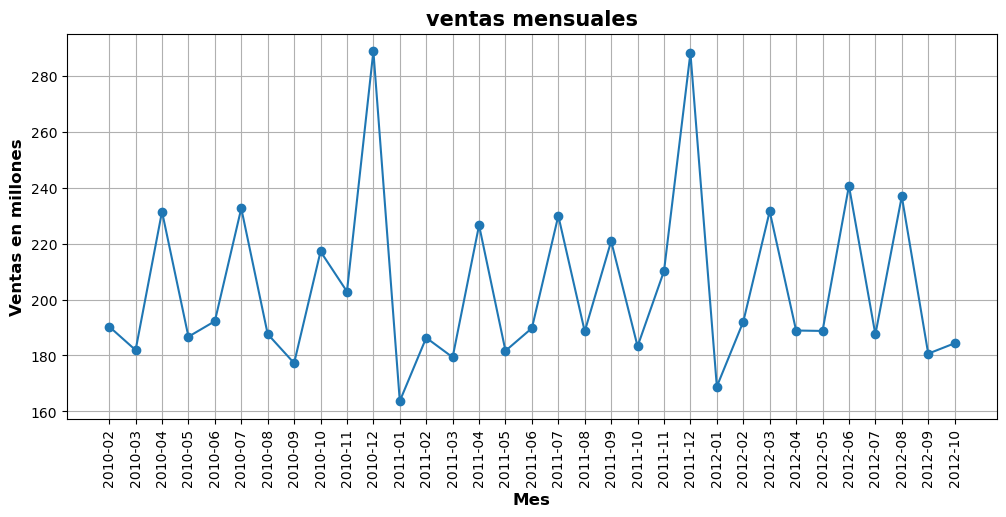

In [11]:
#GRAFICAR VENTAS MENSUALES 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(ventas_mensuales['fecha_mes'],ventas_mensuales['ventas_millones'],marker='o', label='ventas_mensuales')
plt.xticks(rotation=90)  #ROTAR ETIQUETAS DEL EJE X
plt.title('ventas mensuales',fontsize=15,fontweight='bold')#INSERTAR EL TITULO EN NEGRITA
plt.xlabel('Mes',fontsize=12,fontweight='bold')#TITULO EJE X EN NEGRITA
plt.ylabel('Ventas en millones',fontsize=12,fontweight='bold')#TITULO EJE Y EN NEGRITA
plt.grid(True) #LINEAS GUIA
plt.show()

In [12]:
datos.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,fecha_mes
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03
